In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 讀取資料
df = pd.read_csv("classification_data.csv")

# 擷取 features 與 labels
X = df[["lon", "lat"]].values
y = df["label"].values  # 確保是 0 和 1

# 將資料分割為訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Self-implemented GDA Accuracy: 82.40%


/var/folders/v9/k_f3hmzj7v30pkzw9j7d3mzw0000gn/T/ipykernel_57579/542069639.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


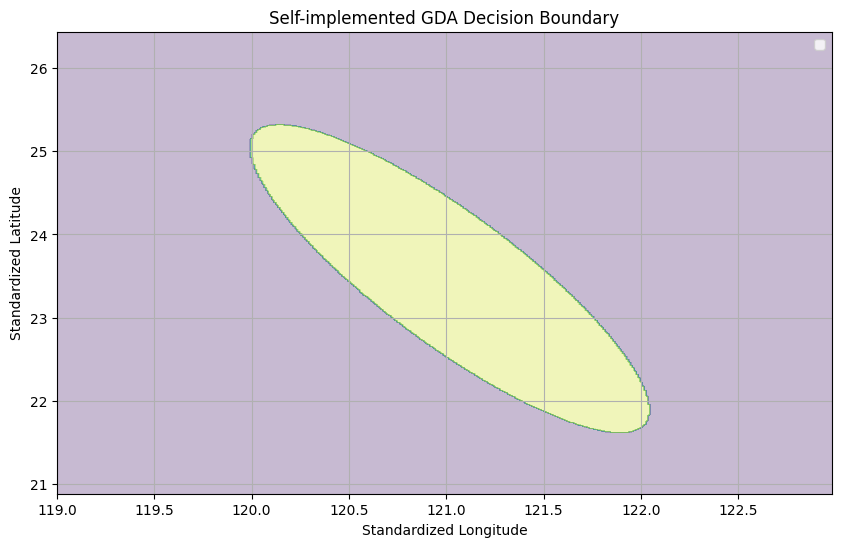

In [6]:
class SelfGDA:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = {}
        self.covariances = {}
        self.priors = {}
        n_samples = X.shape[0]

        for cls in self.classes:
            X_cls = X[y == cls]
            self.means[cls] = np.mean(X_cls, axis=0)
            self.covariances[cls] = np.cov(X_cls, rowvar=False)
            self.priors[cls] = X_cls.shape[0] / n_samples

    def predict(self, X):
        predictions = []
        for x in X:
            posteriors = {}
            for cls in self.classes:
                mean = self.means[cls]
                cov = self.covariances[cls]
                prior = self.priors[cls]
                likelihood = self._multivariate_gaussian(x, mean, cov)
                # likelihood = p(x|y=cls)
                # prior = p(y=cls)
                posteriors[cls] = likelihood * prior
            predictions.append(max(posteriors, key=posteriors.get))
        return np.array(predictions)

    def _multivariate_gaussian(self, x, mean, cov):
        size = len(x)
        det_cov = np.linalg.det(cov)
        norm_const = 1.0 / (np.power((2 * np.pi), size / 2) * np.sqrt(det_cov))
        x_mu = x - mean
        inv_cov = np.linalg.inv(cov)
        result = np.exp(-0.5 * (x_mu @ inv_cov @ x_mu.T))
        return norm_const * result

self_gda = SelfGDA()
self_gda.fit(X_train, y_train)
y_pred_self = self_gda.predict(X_test)
accuracy_self = np.mean(y_pred_self == y_test)
print(f'Self-implemented GDA Accuracy: {accuracy_self * 100:.2f}%')

# Plot the decision boundary for self-implemented GDA

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z_self = self_gda.predict(np.c_[xx.ravel(), yy.ravel()])
Z_self = Z_self.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_self, alpha=0.3)
plt.xlabel('Standardized Longitude')        
plt.ylabel('Standardized Latitude')
plt.title('Self-implemented GDA Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()